<a href="https://colab.research.google.com/github/paarriagadap/notebooks/blob/main/Copy_of_pwt10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Updating the Penn World Tables at OWID

This notebook is for analysing the PWT 9.1 (which OWID currently uses) to update it to the most recent version (10). The idea is to replicate the structure of the older dataset to the new one.

### Index
- [Transformations to get the OWID structure](#Transformations-to-get-the-OWID-structure)
- [Comparing the results to the OWID-modified PWT 9.1](#Comparing-the-results-to-the-OWID-modified-PWT-9.1)

### Appendix
- [The changes in PWT 10.0](#The-changes-in-PWT-10.0)
- [The variables of PWT](#The-variables-of-PWT)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### Data sources
- [PWT 10.0](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)
- [PWT 9.1](https://www.rug.nl/ggdc/productivity/pwt/pwt-releases/pwt9.1)
- [PWT 9.1 in Grapher](https://owid.cloud/admin/datasets/4239) (Processed by Diana Beltekian)

### Documentation
1. [Diana Beltekian PWT 9.1 documentation for OWID](https://docs.google.com/document/d/1Kg9ZqxXXfDWA7WxfDysB0GjwlQ6kK5x6kNP-m7Sjl-I/edit?pli=1#)
2. [User Guide to PWT 10.0](https://www.rug.nl/ggdc/docs/pwt100-user-guide-to-data-files.pdf) (Recommended for new users)
3. [What's new in PWT 10.0?](https://www.rug.nl/ggdc/docs/pwt100-whatsnew.pdf) (Recommended for experienced users)
4. [The Next Generation of the Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/related-research-papers/the_next_generation_of_the_penn_world_table.pdf) (Section I is recommended, because it explains what types of real GDP variables are available and when should be used)
5. [PWT 8.0 - A user guide](https://www.rug.nl/ggdc/docs/pwt_80_user_guide.pdf) (For *a broader understanding of the choices that were made in constructing PWT and some of the ‘health warnings’*)

## Transformations to get the OWID structure
Using as a reference the document [(1)](https://docs.google.com/document/d/1Kg9ZqxXXfDWA7WxfDysB0GjwlQ6kK5x6kNP-m7Sjl-I/edit?pli=1#), the following transformations to PWT 10.0 are done to match the OWID structure in Grapher.
The transformation of many variables consists in multiplying them by 1,000,000 to change their units from "million USD" to just "USD". It is the case for:

- **Expenditure-side real GDP at chained PPPs**, `rgdpe`
- **Output-side real GDP at chained PPPs**, `rgdpo`
- **Real consumption of households and government at current PPPs**, `ccon`
- **Real domestic absorption at current PPPs**, `cda`
- **Expenditure-side real GDP at current PPPs**, `cgdpe`
- **Output-side real GDP at current PPPs**, `cgdpo`
- **Capital stock at current PPPs**, `cn`
- **Real GDP at constant 2011 national prices**, `rgdpna`
- **Real consumption at constant 2011 national prices**, `rconna`
- **Real domestic absorption at constant 2011 national prices**, `rdana`
- **Capital stock at constant 2011 national prices**, `rnna`

Two variables are multiplied by 1,000,000 to express their units in "people" instead of "million people"

- **Population**, `pop`
- **Number of persons engaged**, `emp`

Two variables are renamed:
- `rgdpo` is renamed **Total output-side real GDP**, `tot_rgdp_o`
- `rgdpe` is renamed **Total expenditure-side real GDP**, `tot_rgdp_e`

The variable `Productivity` is estimated as the **total real output-side GDP per hour worked**; it is then `tot_rgdp_o` divided by the average hours worked per persons engaged (`avh`) and the total number of persons engaged (`emp`)

Two real GDP per capita measures are also calculated:
- **Output-side real GDP per capita** (`gdppc_o`), as the total output-side real GDP `tot_rgdp_o` divided by the population `pop`
- **Expenditure-side real GDP per capita** (`gdppc_e`) , as the total expenditure-side real GDP `tot_rgdp_e` divided by the population `pop`



In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.io as pio

#Loading PWT 9.1
pwt9_path = Path('data/pwt91.xlsx')
pwt9 = pd.read_excel(pwt9_path,sheet_name='Data')

#Loading PWT 10.0
pwt10_path = Path('data/pwt100.xlsx')
pwt10 = pd.read_excel(pwt10_path,sheet_name='Data')

#Multiplying by 1 million to get USD instead of millions of USD
pwt10['rgdpe'] = pwt10['rgdpe']*1000000
pwt10['rgdpo'] = pwt10['rgdpo']*1000000
pwt10['ccon'] = pwt10['ccon']*1000000
pwt10['cda'] = pwt10['cda']*1000000
pwt10['cgdpe'] = pwt10['cgdpe']*1000000
pwt10['cgdpo'] = pwt10['cgdpo']*1000000
pwt10['cn'] = pwt10['cn']*1000000
pwt10['rgdpna'] = pwt10['rgdpna']*1000000
pwt10['rconna'] = pwt10['rconna']*1000000
pwt10['rdana'] = pwt10['rdana']*1000000
pwt10['rnna'] = pwt10['rnna']*1000000

#Multiplying by 1 million to get "people" instead of "millions of people"
pwt10['pop'] = pwt10['pop']*1000000
pwt10['emp'] = pwt10['emp']*1000000

#New variables which are a direct transformation of others:

pwt10['tot_rgdp_o'] = pwt10['rgdpo']
pwt10['tot_rgdp_e'] = pwt10['rgdpe']

#Productivity = (tot_rgdp_o) / (avh*emp)
#Productivity is total real output-side GDP per hour worked; where hours worked are calculated by multiplying
#the average hours worked per persons engaged by the total number of persons engaged.
pwt10['Productivity'] = pwt10['tot_rgdp_o']/(pwt10['avh']*pwt10['emp'])

#Gdppc_o = tot_rgdpo / pop
#Output-side real GDP per capita is calculated by dividing total output-side GDP by the total population.
pwt10['gdppc_o'] = pwt10['tot_rgdp_o']/pwt10['pop']

#Gdppc_e = tot_rgdpe / pop
#Expenditure-side real GDP per capita is calculated by dividing total expenditure-side GDP by the total population.
pwt10['gdppc_e'] = pwt10['tot_rgdp_e']/pwt10['pop']

An interative calculation is necessary to create the `rgdpe_60`. This is the **real GDP per capita (expenditure-side) in 1960**. It is then `gdppc_e` value for each country in 1960.

In [ ]:
for i in range(len(pwt10)): #runs for the entire length of th dataframe
    country = pwt10['countrycode'][i] #gets the country from row i
    #gets GDP_E from 1960 and the country I calculated in the previous row:
    gdp60_country = pwt10.loc[(pwt10['countrycode'] == country) & (pwt10['year'] == 1960), 'gdppc_e'].iloc[0]
    pwt10.loc[i,'rgdpe_60'] = gdp60_country #assigns the 1960 GDP value from "country" to every year for that country

The variable `gdppc_o_yearbefore` is the **GDP per capita (output-side) lagged by one year**. This variable will be useful for the estimation of `rgdpo_17_60`, the average growth between 1960 and 2019.

In [ ]:
for i in range(len(pwt10)): #runs for the entire length of th dataframe
    country = pwt10['countrycode'][i] #gets the country from row i
    year = pwt10['year'][i] #gets the year from row i
    try:
        #gets the gdp from "country" the year before to "year"
        gdp_yearbefore = pwt10.loc[(pwt10['countrycode'] == country) & (pwt10['year'] == year-1), 'gdppc_o'].iloc[0]
    except: #in case of error (no row available, no year before)
        gdp_yearbefore = None
    pwt10.loc[i,'gdppc_o_yearbefore'] = gdp_yearbefore #assigns the gdp from the previous year to the following year's row

**The real GDP growth per capita 1960-2019** (`rgdpo_17_60`) is defined as the average of the yearly growth rate of GDP per capita over the period 1960-2019. This is the mean of the logarithm of the GDP per capita (output-side) minus the GDP per capita (output-side) lagged by one year. To estimate this a separate dataset by country is generated.

In [ ]:
#rgdpo_17_60 = mean(logrgdppco[_n] - logrgdppco[_n-1]) where logrgdppco = log(tot_rgdp_o/pop)
#Real GDP growth per capita is calculated as the average of the yearly growth rate of GDP per capita over the period 1960-2017.

#Filters the data only between 1960 and 2019 (before it was until 2017)
pwt10_60 = pwt10[(pwt10['year']>=1960) & (pwt10['year']<=2019)].copy().reset_index(drop=True)
#Calculates the difference between log(gdppc_o) from current year and the one from previous year
pwt10_60['log_diff'] = np.log(pwt10_60['gdppc_o']) - np.log(pwt10_60['gdppc_o_yearbefore'])

country_list = list(pwt10_60['countrycode'].unique()) #gets list of countries
growth_db = pd.DataFrame(columns=pwt10_60.columns) #creates an empty dataframe to use it in the following interation

for i in country_list: #for each country
    db_percountry = pwt10_60[pwt10_60['countrycode']==i].copy().reset_index(drop=True) #dataframe with data from country i
    growth_db_aux = pd.DataFrame(columns=db_percountry.columns) #another empty dataset to temporarily poblate fill it with data
    
    growth_db_aux.loc[0,'countrycode'] = i #assigns country i
    growth_db_aux.loc[0,'rgdpo_17_60'] = db_percountry['log_diff'].mean() #assigns the average gdp from 1960 to 1960
    growth_db_aux.loc[0,'rgdpo_17_60_count'] = db_percountry['log_diff'].count() #counts how many times the log diff is
    
    #growth_db = growth_db.append(growth_db_aux,ignore_index=True) #Each country row is appended to get the growth per country db
    growth_db = pd.concat([growth_db, growth_db_aux], ignore_index=True)

growth_db['year'] = 1960
growth_db

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,tot_rgdp_o,tot_rgdp_e,Productivity,gdppc_o,gdppc_e,rgdpe_60,gdppc_o_yearbefore,log_diff,rgdpo_17_60,rgdpo_17_60_count
0,ABW,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029081,49.0
1,AGO,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007981,49.0
2,AIA,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008441,49.0
3,ALB,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028415,49.0
4,ARE,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.030916,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,VNM,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042770,49.0
179,YEM,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031258,30.0
180,ZAF,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010587,60.0
181,ZMB,NaN,NaN,1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010069,60.0


To derive variables associated with imports and exports it is necessary to load the additional National Accounts data file from PWT 10.0:

In [ ]:
#loads the PWT 10.0 National Accounts dataset
pwt10_na_path = Path('data/pwt100-na-data.xlsx')
pwt10_na = pd.read_excel(pwt10_na_path,sheet_name='Data')
pwt10_na

,countrycode,year,v_c,v_i,v_g,v_x,v_m,v_gdp,q_c,q_i,...,q_x,q_m,q_gdp,pop,xr,xr2,v_gfcf,q_gfcf,emp,avh
0,ABW,1970,190.088493,104.832028,46.397118,329.084418,303.871063,353.746880,273.190291,119.433299,...,445.736416,391.184712,468.555156,0.059063,1.79,1.79,103.706505,111.510398,NaN,NaN
1,ABW,1971,200.221731,110.420430,48.870444,346.627254,320.069766,372.604474,298.019110,130.287976,...,486.247090,426.737440,511.139668,0.059440,1.79,1.79,109.234925,121.644999,NaN,NaN
2,ABW,1972,210.895206,116.306757,51.475666,365.105375,337.132239,392.467331,325.104522,142.129179,...,530.439550,465.521361,557.594507,0.059840,1.79,1.79,115.058025,132.700685,NaN,NaN
3,ABW,1973,222.137686,122.506820,54.219742,384.568500,355.104176,413.389041,354.651654,155.046523,...,578.648462,507.830218,608.271350,0.060243,1.79,1.79,121.191526,144.761124,NaN,NaN
4,ABW,1974,233.979260,129.037449,57.109995,405.068867,374.033561,435.426048,386.883976,169.137938,...,631.238762,553.984269,663.553971,0.060528,1.79,1.79,127.652126,157.917756,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12583,ZWE,2015,17870.048580,2003.427020,3768.540612,3824.968960,7503.864558,19963.120615,19269.601831,2042.669710,...,3416.694225,6702.906865,20892.749447,13.814629,1.00,1.00,1995.427020,2033.663696,6.393752,NaN
12584,ZWE,2016,17126.635457,2026.381291,3724.229586,4098.132104,6426.700365,20548.678073,17249.390687,2052.255128,...,4134.227086,6483.304601,21050.671851,14.030331,1.00,1.00,2015.381291,2043.717050,6.504374,NaN
12585,ZWE,2017,17491.357666,2138.449666,4772.171591,4332.805617,6693.882240,22040.902301,17491.357666,2138.449666,...,4332.805617,6693.882240,22040.902301,14.236595,1.00,1.00,2130.449666,2130.449666,6.611773,NaN
12586,ZWE,2018,18729.151593,2272.487586,6228.315843,4619.344609,7537.739087,24311.560545,16321.578110,2239.042905,...,3064.543950,5000.651537,23105.406901,14.438802,1.00,1.00,2262.487586,2227.451318,6.714952,NaN


This dataset is now merged with the PWT 10.0 (only the variables needed are selected):

In [ ]:
#merge between pwt10 and pwt10_na (only 'v_x','v_m','v_gdp','xr2')
merge_pwtna_10 = pd.merge(pwt10, pwt10_na[['countrycode','year','v_x','v_m','v_gdp','xr2']], 
                          on=['countrycode','year'], how='left',validate='one_to_one')

Now the variable `Ratio` can be generated. This is the **Ratio of exports and imports to GDP (%)** and it is defined as the sum of exports and imports divided by the GDP at current prices. Although it is not necessary to transform them to USD, the calculation is useful to get the world trade variable afterwards.

In [ ]:
#Ratio = ((ex_usd + imp_usd) / gdp_usd )*100, where ex_usd = v_x / xr2 to convert export (and v_m for import) values into US$.
#The ratio of exports and imports to GDP is calculated by summing a country’s total imports and exports, then dividing by the country’s GDP - after all values have been converted to US$.

merge_pwtna_10['exp_usd'] = merge_pwtna_10['v_x']/merge_pwtna_10['xr2']
merge_pwtna_10['imp_usd'] = merge_pwtna_10['v_m']/merge_pwtna_10['xr2']
merge_pwtna_10['gdp_usd'] = merge_pwtna_10['v_gdp']/merge_pwtna_10['xr2']
merge_pwtna_10['Ratio'] = (merge_pwtna_10['exp_usd'] + merge_pwtna_10['imp_usd'])/merge_pwtna_10['gdp_usd']*100

Similarly to the `Ratio`, **the world trade (% of GDP)** is defined as the sum of all world exports and imports divided by the world GDP. To estimate this a separate dataset by year is generated.

In [ ]:
#World trade (% of GDP) = [ (world imports + world exports) / (world GDP) ]*100
#World trade is constructed by summing countries’ total imports to arrive at the ‘world’ estimate of imports,
#and doing the same for total exports, and GDP in each year to arrive at a ‘world’ estimate for each of the respective variables.

year_list = list(merge_pwtna_10['year'].unique()) #gets the list of years
world_db = pd.DataFrame(columns=merge_pwtna_10.columns) #creates an empty dataframe to use in the following interation

for i in year_list: #for each year
    #creates a filtered dataset for year i
    db_peryear = merge_pwtna_10[merge_pwtna_10['year']==i].copy().reset_index(drop=True)
    world_db_aux = pd.DataFrame(columns=db_peryear.columns) #auxiliar dataset to fill it with data per year
    
    world_db_aux.loc[0,'year'] = i #assign year i to the auxiliar dataset 
    world_db_aux.loc[0,'world_imports'] = db_peryear['imp_usd'].sum() #assign the sum of imp_usd to the auxiliar dataset 
    world_db_aux.loc[0,'world_exports'] = db_peryear['exp_usd'].sum() #assign the sum of exp_usd to the auxiliar dataset 
    world_db_aux.loc[0,'world_gdp'] = db_peryear['gdp_usd'].sum() #assign the sum of gdp_usd to the auxiliar dataset 
    
    #world_db = world_db.append(world_db_aux,ignore_index=True) #Each year row is appended to get the trade per year db afterwards
    world_db = pd.concat([world_db, world_db_aux], ignore_index=True)

world_db['country'] = "World" #assigns the country "World"

#estimation of the world trade, according to the formula
world_db['world_trade'] = (world_db['world_imports'] + world_db['world_exports'])/world_db['world_gdp']*100
world_db

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,v_gdp,xr2,exp_usd,imp_usd,gdp_usd,Ratio,world_imports,world_exports,world_gdp,world_trade
0,NaN,World,NaN,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.908827e+04,5.999312e+04,6.025618e+05,19.762519
1,NaN,World,NaN,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.197005e+04,7.966989e+04,7.115964e+05,22.715116
2,NaN,World,NaN,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.167701e+04,8.132733e+04,7.958497e+05,20.481800
3,NaN,World,NaN,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.194889e+04,8.046128e+04,8.502138e+05,19.102274
4,NaN,World,NaN,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.676557e+04,8.528570e+04,8.753175e+05,19.655869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,World,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.083075e+07,2.113060e+07,7.464424e+07,56.215122
66,NaN,World,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.027361e+07,2.078581e+07,7.581486e+07,54.157479
67,NaN,World,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.235689e+07,2.286164e+07,8.063839e+07,56.075680
68,NaN,World,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.442194e+07,2.507296e+07,8.573956e+07,57.727036


To have every variable in the same dataset, this code joins the main PWT 10.0 with the by country and by year datasets used to generate the real GDP growth per capita 1960-2019 and the world trade.

In [ ]:
pwt10_owid = pd.merge(merge_pwtna_10, growth_db[['countrycode','year','rgdpo_17_60','rgdpo_17_60_count']], 
                      on=['countrycode','year'], how='left',validate='one_to_one')
#pwt10_owid = pwt10_owid.append(world_db,ignore_index=True)
pwt10_owid = pd.concat([pwt10_owid, world_db], ignore_index=True)

pwt10_owid

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,exp_usd,imp_usd,gdp_usd,Ratio,rgdpo_17_60,rgdpo_17_60_count,world_imports,world_exports,world_gdp,world_trade
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12875,NaN,World,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.083075e+07,2.113060e+07,7.464424e+07,56.215122
12876,NaN,World,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.027361e+07,2.078581e+07,7.581486e+07,54.157479
12877,NaN,World,NaN,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.235689e+07,2.286164e+07,8.063839e+07,56.075680
12878,NaN,World,NaN,2018,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.442194e+07,2.507296e+07,8.573956e+07,57.727036


The file is saved to use the country standardisation tool from OWID.

In [ ]:
file = Path('data/pwt10_owid.csv')
pwt10_owid.to_csv(file, index=False)

## Comparing the results to the OWID-modified PWT 9.1
After using the [Country Standardizer Tool](https://owid.cloud/admin/standardize) the transformed PWT v10.0 table is reuploaded:

In [ ]:
pwt10_path = Path('data/pwt10_owid_country_standardized.csv')
pwt10_owid = pd.read_csv(pwt10_path)
pwt10_owid

,countrycode,country,Our World In Data Name,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,...,exp_usd,imp_usd,gdp_usd,Ratio,rgdpo_17_60,rgdpo_17_60_count,world_imports,world_exports,world_gdp,world_trade
0,ABW,Aruba,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12875,NaN,World,World,NaN,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.083075e+07,2.113060e+07,7.464424e+07,56.215122
12876,NaN,World,World,NaN,2016,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.027361e+07,2.078581e+07,7.581486e+07,54.157479
12877,NaN,World,World,NaN,2017,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.235689e+07,2.286164e+07,8.063839e+07,56.075680
12878,NaN,World,World,NaN,2018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.442194e+07,2.507296e+07,8.573956e+07,57.727036


The original PWT 9.1 dataset processed by Diana Beltekian is here:

In [ ]:
pwt9_path = Path('data/Penn World Tables version 9.1 (2019).csv')
pwt9_owid = pd.read_csv(pwt9_path)
pwt9_owid

,Entity,Year,Population (PWT 9.1 (2019)),Number of persons engaged (emp) (PWT 9.1 (2019)),Average annual hours worked by persons engaged (avh) (PWT 9.1 (2019)),Human capital index (hc) (PWT 9.1 (2019)),Real consumption of households and government (ccon) (PWT 9.1 (2019)),Real domestic absorption (cda) (PWT 9.1 (2019)),Expenditure-side real GDP (cgdpe) (PWT 9.1 (2019),Output-side real GDP (cgdpo) (PWT 9.1 (2019)),...,"Price level of the capital services, price level of USA=1 (pl_k) (PWT 9.1 (2019))",Total output-side real GDP at chained PPPs (tot_rgdp_o) (PWT 9.1 (2019)),Total expenditure-side real GDP (tot_rgdp_e) (PWT 9.1 (2019)),Productivity (PWT 9.1 (2019)),Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019)),Expenditure-side real GDP per capita (gdppc_e) (PWT 9.1 (2019)),"Average real GDP per capita growth 1960-2017, chained PPPs in 2011 US$ (PWT 9.1 (2019))",Real GDP per capita in 1960 at chained PPPs in 2011 US$ (PWT 9.1 (2019)),Ratio of exports and imports to GDP (%) (PWT 9.1 (2019)),World trade (% of GDP) (PWT 9.1) (PWT 9.1 (2019))
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.728111,NaN
1,Afghanistan,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.063137,NaN
2,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.869080,NaN
3,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.692308,NaN
4,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.865982,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931,Zimbabwe,2013,15054506.0,7914061.0,NaN,2.504635,3.032034e+10,3.334116e+10,2.822205e+10,2.858652e+10,...,0.704313,2.832981e+10,2.808694e+10,NaN,1881.8159,1865.6831,NaN,NaN,72.471466,NaN
11932,Zimbabwe,2014,15411675.0,8222111.5,NaN,2.550258,3.083923e+10,3.421201e+10,2.956518e+10,2.982345e+10,...,0.704991,2.935576e+10,2.921755e+10,NaN,1904.7742,1895.8065,NaN,NaN,67.072449,NaN
11933,Zimbabwe,2015,15777451.0,8530669.0,NaN,2.584653,3.377164e+10,3.722099e+10,3.036875e+10,3.001469e+10,...,0.713156,2.915075e+10,3.009192e+10,NaN,1847.6211,1907.2740,NaN,NaN,69.482147,NaN
11934,Zimbabwe,2016,16150362.0,8839398.0,NaN,2.616257,3.220806e+10,3.558840e+10,3.121497e+10,3.051792e+10,...,0.718671,2.942045e+10,3.097429e+10,NaN,1821.6588,1917.8699,NaN,NaN,63.326458,NaN


One option to compare the results is to merge both PWT 9.1 and 10.0 modified files by country and year:

In [ ]:
pwt910_owid = pd.merge(pwt10_owid, pwt9_owid, left_on=['Our World In Data Name','year'], right_on=['Entity', 'Year'],
                       how='left')
pwt910_owid = pwt910_owid.apply(pd.to_numeric, errors='ignore')

Th `describe()` command provides descriptive statistics for each pair of created variables, the ones from 10.0 and the ones from 9.1.


**Productivity** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['Productivity',
            'Productivity (PWT 9.1 (2019))']].describe()

,Productivity,Productivity (PWT 9.1 (2019))
count,3492.000000,3373.000000
mean,23.704562,20.385341
std,18.875527,16.144944
min,0.767641,0.581635
25%,8.694989,7.440670
50%,19.038816,16.455084
75%,34.591091,29.727093
max,129.025422,109.772140


**Output-side real GDP per capita (gdppc_o)** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['gdppc_o',
            'Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))']].describe()

,gdppc_o,Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))
count,10399.000000,9985.000000
mean,14101.818868,12936.688196
std,23746.747198,30659.574977
min,214.553121,131.300230
25%,2582.729843,2288.108200
50%,6688.895069,5705.457000
75%,16700.608434,14579.869000
max,444763.340174,792461.310000


**Expenditure-side real GDP per capita (gdppc_e)** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['gdppc_e',
            'Expenditure-side real GDP per capita (gdppc_e) (PWT 9.1 (2019))']].describe()

,gdppc_e,Expenditure-side real GDP per capita (gdppc_e) (PWT 9.1 (2019))
count,10399.000000,9985.000000
mean,13261.811888,11740.473797
std,19073.187025,16880.245441
min,244.600971,223.094570
25%,2484.828579,2263.862500
50%,6450.842889,5683.105000
75%,16564.711641,14765.556000
max,283541.174514,255408.940000


**Real GDP per capita in 1960 at chained PPPs** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['rgdpe_60',
            'Real GDP per capita in 1960 at chained PPPs in 2011 US$ (PWT 9.1 (2019))']].describe()

,rgdpe_60,Real GDP per capita in 1960 at chained PPPs in 2011 US$ (PWT 9.1 (2019))
count,7770.000000,111.000000
mean,4675.059081,4303.553255
std,4673.684249,4285.279982
min,516.729531,424.821320
25%,1481.193938,1351.188050
50%,2823.067669,2641.901100
75%,6251.700804,5497.519050
max,22529.517768,20199.258000


**Average real GDP per capita growth 1960-2017 (2019), chained PPPs** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['rgdpo_17_60',
            'Average real GDP per capita growth 1960-2017, chained PPPs in 2011 US$ (PWT 9.1 (2019))']].describe()

,rgdpo_17_60,"Average real GDP per capita growth 1960-2017, chained PPPs in 2011 US$ (PWT 9.1 (2019))"
count,183.000000,182.000000
mean,0.020018,0.019635
std,0.017703,0.019248
min,-0.058615,-0.067871
25%,0.011938,0.011979
50%,0.020645,0.020653
75%,0.029575,0.030583
max,0.088587,0.098073


**Ratio of exports and imports to GDP (%)** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['Ratio',
            ' Ratio of exports and imports to GDP (%) (PWT 9.1 (2019))']].describe()

,Ratio,Ratio of exports and imports to GDP (%) (PWT 9.1 (2019))
count,10399.000000,10053.000000
mean,76.805711,76.536571
std,51.389653,50.747817
min,0.193331,3.272921
25%,41.839919,41.906254
50%,66.272038,66.315453
75%,98.751762,99.309967
max,442.620019,442.620030


**World trade (% of GDP)** statistics for PWT 9.1 and PWT 10.0:

In [ ]:
pwt910_owid[['world_trade',
            'World trade (% of GDP) (PWT 9.1) (PWT 9.1 (2019))']].describe()

,world_trade,World trade (% of GDP) (PWT 9.1) (PWT 9.1 (2019))
count,70.000000,68.000000
mean,37.224564,36.406719
std,13.391173,13.036881
min,19.102274,18.674465
25%,22.759858,22.497763
50%,36.344930,35.973371
75%,46.893291,46.114951
max,61.278147,61.113140


Every variable shows consistency between v9.1 and 10.0 in aggregate statistics.

But how about differences **by country**?

A practical way to compare the transformed variables between both versions is creating a ratio between both estimates (v10.0/v9.1): if the ratio equals 1 it means the values stay the same, if it is greater than 1 it means the value has been corrected upwards and if it less than one it means the value has been reduced for v10.0.

The `_vs` variables in this code represent these values.

In [ ]:
pwt910_owid['gdppc_o_vs'] = pwt910_owid['gdppc_o']/pwt910_owid['Output-side real GDP per capita (gdppc_o) (PWT 9.1 (2019))']

pwt910_owid['gdppc_e_vs'] = pwt910_owid['gdppc_e']/pwt910_owid['Expenditure-side real GDP per capita (gdppc_e) (PWT 9.1 (2019))']

pwt910_owid['rgdpe_60_vs'] = pwt910_owid['rgdpe_60']/pwt910_owid['Real GDP per capita in 1960 at chained PPPs in 2011 US$ (PWT 9.1 (2019))']

pwt910_owid['Productivity_vs'] = pwt910_owid['Productivity']/pwt910_owid['Productivity (PWT 9.1 (2019))']

pwt910_owid['rgdpo_17_60_vs'] = pwt910_owid['rgdpo_17_60']/pwt910_owid['Average real GDP per capita growth 1960-2017, chained PPPs in 2011 US$ (PWT 9.1 (2019))']

pwt910_owid['Ratio_vs'] = pwt910_owid['Ratio']/pwt910_owid[' Ratio of exports and imports to GDP (%) (PWT 9.1 (2019))']

pwt910_owid['world_trade_vs'] = pwt910_owid['world_trade']/pwt910_owid['World trade (% of GDP) (PWT 9.1) (PWT 9.1 (2019))']

pwt910_owid_0 = pwt910_owid.fillna(0)

It seems [it's not possible](https://github.com/plotly/plotly.py/issues/931) to render Plotly with interactivity on GitHub, so it is necessary to switch renderers depending on use.

[About renderers in Plotly](https://plotly.com/python/renderers/)

**Output-side real GDP per capita (gdppc_o)** compared by country:

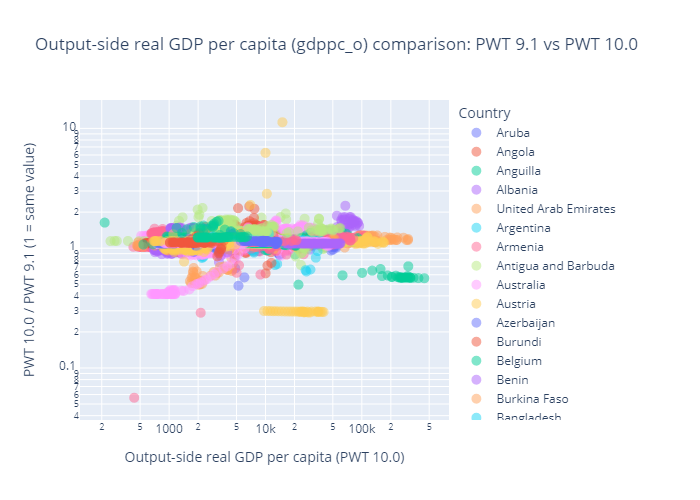

In [ ]:
pio.renderers.default = "png" #"png" for GitHub, "notebook_connected" for local analysis

fig = px.scatter(pwt910_owid_0, x="gdppc_o", y="gdppc_o_vs", 
                 hover_data=['Our World In Data Name', 'year'], opacity=0.5, color='Our World In Data Name', 
                 title="Output-side real GDP per capita (gdppc_o) comparison: PWT 9.1 vs PWT 10.0",
                 log_x=True,
                 log_y=True,
                labels={
                     "gdppc_o": "Output-side real GDP per capita (PWT 10.0)",
                     "gdppc_o_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country"
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

Though most of the results show ratios around 1, there are extreme upward corrections for **Turks and Caicos Islands** (3x, 6x and even 11x in 2015, 2016 and 2017, respectively). Countries with ~2x corrections include **Liberia, Mauritania, Zimbabwe, Iraq (90s, early 2000s), Fiji, Paraguay, Antigua and Barbuda, Montserrat, Equatorial Guinea, British Virgin Islands and Cayman Islands**. Countries with noticeable reductions for the value of this measure include **El Salvador, Nigeria, Yemen (2017), Myanmar (2012), Kyrgyzstan, Iraq (2015, 2016, 2017), Barbados, Trinidad and Tobago, Seychelles (2017), Turks and Caicos Islands (70s to early 2000s) and Bermuda**, which stills shows some of the highest GDP per capita in the world, even if reduced by ~40%. But the most dramatic case is the one for **Venezuela (2017)**, which sees its value virtually destroyed by the reestimation: it is now 5% of the value from v9.1 (x0.05).

**Expenditure-side real GDP per capita (gdppc_e)** compared by country:

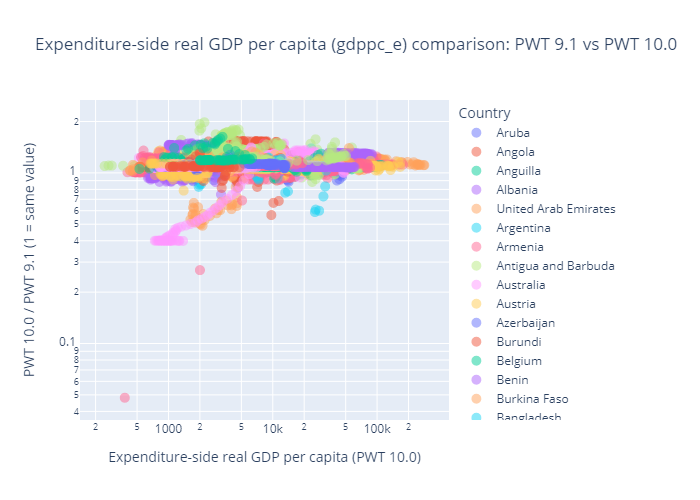

In [ ]:
fig = px.scatter(pwt910_owid_0, x="gdppc_e", y="gdppc_e_vs", 
                 hover_data=['Our World In Data Name', 'year'], opacity=0.5, color='Our World In Data Name', 
                 title="Expenditure-side real GDP per capita (gdppc_e) comparison: PWT 9.1 vs PWT 10.0",
                 log_x=True,
                 log_y=True,
                labels={
                     "gdppc_e": "Expenditure-side real GDP per capita (PWT 10.0)",
                     "gdppc_e_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country"
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

For the expenditure-side GDP pc, there is a similar picture, but not identical. Corrections for **Mauritania** are the highest (~2x), followed by observations in **Niger, Liberia, Zimbabwe, Iraq, Paraguay, Fiji and Equatorial Guinea** (around 1.5x). The most evident decreases are in **El Salvador, Nigeria, Myanmar (2012, 2017), Iraq (2015, 2016, 2017), Barbados (1992, 1993) and Trinidad and Tobago** and above all **Venezuela in 2016 and 2017**.

**Productivity** compared by country:

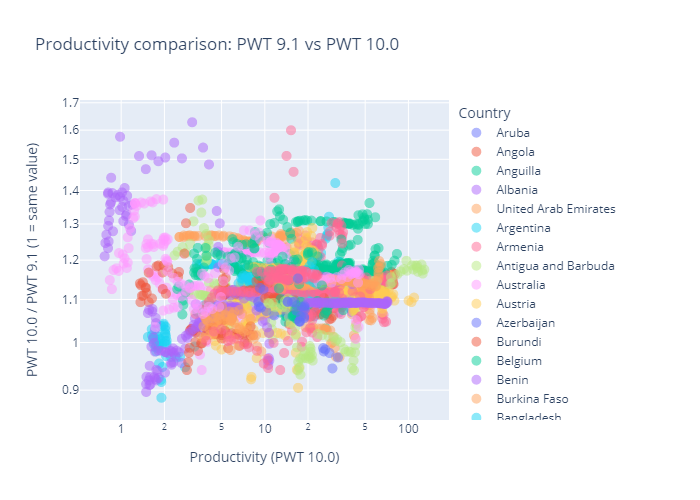

In [ ]:
fig = px.scatter(pwt910_owid_0, x="Productivity", y="Productivity_vs", 
                 hover_data=['Our World In Data Name', 'year'], opacity=0.5, color='Our World In Data Name', 
                 title="Productivity comparison: PWT 9.1 vs PWT 10.0",
                 log_x=True,
                 log_y=True,
                 labels={
                     "Productivity": "Productivity (PWT 10.0)",
                     "Productivity_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country"
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

In the case of productivity most of the values seem to have increased in the 10%-20% range. For **Myanmar** they have increased by 20%, 40% and even 60%, **Bulgaria** shows values in the nineties increased by around 50%. Around the 40% increase there is **Cambodia, Indonesia and Argentina** in recent years. On the other side, the more noticeable reductions are around 0.9x, so it seems not problematic.

**Real GDP per capita in 1960 (expenditure-side)** compared by country:

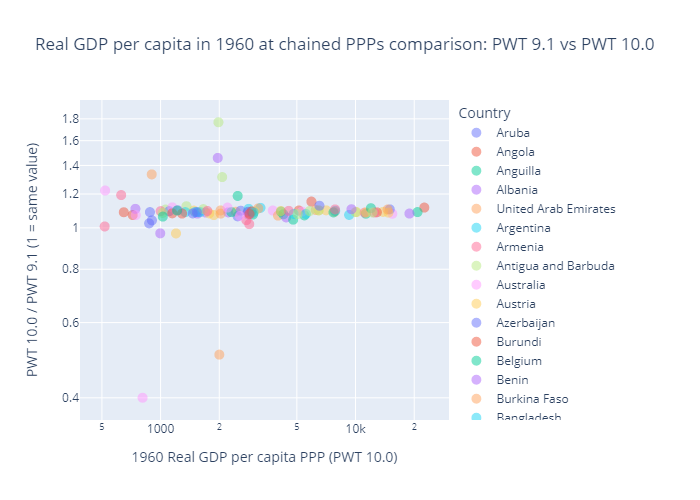

In [ ]:
fig = px.scatter(pwt910_owid_0, x="rgdpe_60", y="rgdpe_60_vs", 
                 hover_data=['Our World In Data Name'], opacity=0.5, color='Our World In Data Name', 
                 title="Real GDP per capita in 1960 at chained PPPs comparison: PWT 9.1 vs PWT 10.0",
                 log_x=True,
                 log_y=True,
                labels={
                     "rgdpe_60": "1960 Real GDP per capita PPP (PWT 10.0)",
                     "rgdpe_60_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country",
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

Most of the data for 1960 seems to be corrected around 1.1x. The most notable corrections are for **Mauritania (1.8x), Niger (1.5), Burkina Faso,  Paraguay (1.3x), Nigeria (0.5x) and El Salvador (0.4x)**

**Average real GDP per capita growth from 1960** compared by country:

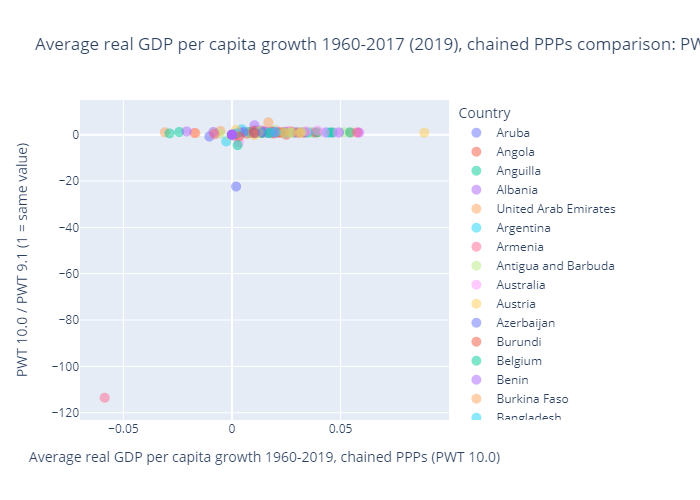

In [ ]:
fig = px.scatter(pwt910_owid_0, x="rgdpo_17_60", y="rgdpo_17_60_vs", 
                 hover_data=['Our World In Data Name', "Average real GDP per capita growth 1960-2017, chained PPPs in 2011 US$ (PWT 9.1 (2019))", 'rgdpo_17_60_count'],
                 opacity=0.5, color='Our World In Data Name', 
                 title="Average real GDP per capita growth 1960-2017 (2019), chained PPPs comparison: PWT 9.1 vs PWT 10.0",
                 log_x=False,
                 log_y=False,
                labels={
                     "rgdpo_17_60": "Average real GDP per capita growth 1960-2019, chained PPPs (PWT 10.0)",
                     "rgdpo_17_60_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country",
                    "Average real GDP per capita growth 1960-2017, chained PPPs in 2011 US$ (PWT 9.1 (2019))": "Average real GDP per capita growth 1960-2017, chained PPPs (PWT 9.1)",
                    "rgdpo_17_60_count": "Number of observations"
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

Differences in growth from 1960 are notable for **Guinea, Togo, Benin, El Salvador, Qatar, Barbados, Antigua and Barbuda (around 2x more in PWT 10.0), Cayman Islands (4x) and Nigeria (5x)**. The reductions are concentrated in **Liberia, Belize, Algeria, Burundi, Sin Maarten (Dutch), Haiti (0.2x-0.4x), Montserrat (0.1x) and Nicaragua (0.04x)**. But there are also examples where the estimated ratio is negative (the growth is negative in one of the PWT): **Venezuela** shows a value of -113.5x, because for PWT 9.1 the average growith for this country was 0.05% and for PWT 10.0 it is -5%. **Chad** is also in this situation with a value for V10.0 of -22x PWT 9.1. Other countries with smaller negative values include **Zimbabwe (-4.5x), Bahamas (-3.3x), Gambia (2.9x), Ukraine, Kyrgysztan, Brunei and Madagascar (0 to -1x)**.

Bosnia and Herzegovina shows a higher growth than the rest, but it is mostly because it is a more recent country with less observations (29) and less variance.

**Ratio of exports and imports to GDP (%)** compared by country:

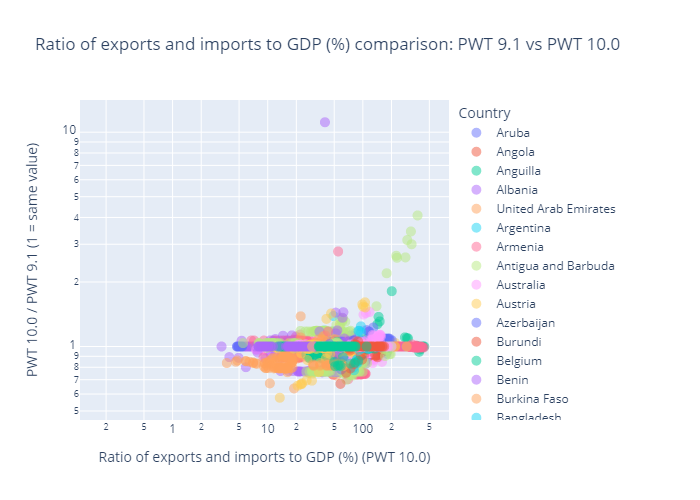

In [ ]:
fig = px.scatter(pwt910_owid_0, x="Ratio", y="Ratio_vs", 
                 hover_data=['Our World In Data Name', 'year'], opacity=0.5, color='Our World In Data Name', 
                 title="Ratio of exports and imports to GDP (%) comparison: PWT 9.1 vs PWT 10.0",
                 log_x=True,
                 log_y=True,
                labels={
                     "Ratio": "Ratio of exports and imports to GDP (%) (PWT 10.0)",
                     "Ratio_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country"
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

Most of the ratios stay similar between PWT 9.1 and 10.0, but there are some cases to note, as **Myanmar** in 1992, where the Ratio in the last version increased by 11 times, **Djibouti** this factor ranges between 2 and 4, in **Venzuela** it is almost 3 and in **Anguilla** it is 1.8 in 2017. **Grenada, Dominica, Yemen and Gambia** in selected years increased by 1.5x. On the other side the largest decreases are in **Serbia in the nineties, Brazil 1982, Togo 2017 and Sudan 2017**, around 0.6x.

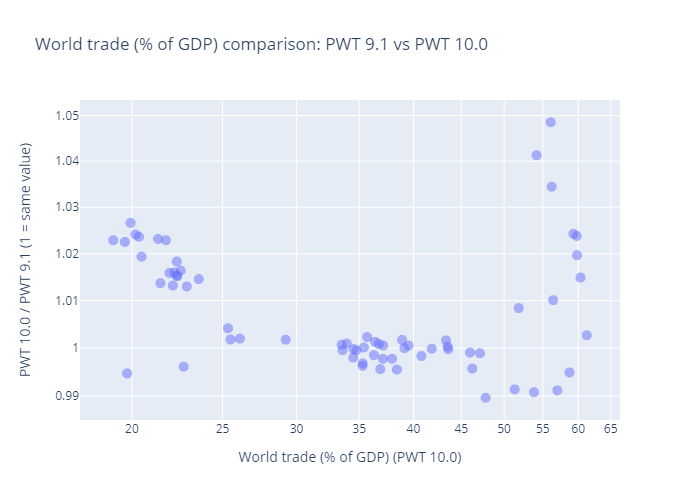

In [ ]:
fig = px.scatter(pwt910_owid_0, x="world_trade", y="world_trade_vs", 
                 hover_data=['year'], opacity=0.5, 
                 title="World trade (% of GDP) comparison: PWT 9.1 vs PWT 10.0",
                 log_x=True,
                 log_y=True,
                labels={
                     "world_trade": "World trade (% of GDP) (PWT 10.0)",
                     "world_trade_vs": "PWT 10.0 / PWT 9.1 (1 = same value)",
                     "Our World In Data Name": "Country"
                 })

fig.update_traces(marker=dict(size=10, line=dict(width=0, color='blue')))
fig.show()

Because of the aggregation of the world trade indicator the changes are not as noticeable as the ones in previous graphs and the ratio between v9.1 and v10.0 ranges between 0.99 (2003) and 1.05 (2017)

## Appendix

## The changes in PWT 10.0
According to [(2)](https://www.rug.nl/ggdc/docs/pwt100-user-guide-to-data-files.pdf), in its variables and their construction, version 10 **"closely resembles PWT versions 8.0, 8.1, 9.0
and 9.1"**. The changes from 9.1 to 10 include **"new relative price data, extended and revised
national accounts data, revisions to how we estimate employment data and a modification to the methodology for estimating investment by asset"**.

According to [(3)](https://www.rug.nl/ggdc/docs/pwt100-whatsnew.pdf), comparing with the 8.0 version (the last big change in the dataset) **"the main structure of the database and definition of its variables are unchanged in PWT 10.0"**. The changes fall in four broad categories:
1. *The incorporation of new purchasing power parities (PPPs) data for most countries for the years 2011 to 2017*
    
    PWT 10.0 adds revised ICP benchmarks for 2011, new benchmarks for 2017 and interpolated benchmarks for 2012-2016. Price levels for the expenditure categories are revised substantially. v9.1 interpolated the 2011 ICP benchmark for 2017 and for v10 they rely on direct ICP benchmark for nearly all countries, also replacing 2014 OECD and 2011-2017 Eurostat benchmarks. All of these changes lead to a higher dispersion in the differences. For years between the 2011 and 2017 ICP benchmarks, they rely on interpolations by the World Bank. Corrections to the GDP expenditure composition also result in additional adjustments clearer than household consumption in 2017.
    
    With the incorporation of the 2017 ICP data, the reference year has changed from 2011 in v9.0 and 9.1 to 2017 in v10.
    
    
2. *The incorporation of revised and extended National Accounts data, covering the period up to 2019*

    (1) mainly affects price levels, the new National Accounts data mainly affects nominal GDP levels and real growth rates. These revisions are commonly observed for African nations, but also in Latin America, the Caribban and Middle East (Paraguay, Niger and Djibouti are highlighted. It is mentioned in the document that these revisions are both welcome and alarming, because they reflect the effort made the national agencies, but also underscore the uncertainty about the true size of some economies.
    
    
3. *Revisions to how we estimate employment data, in particular for low and middle-income countries*
    
    v10.0 makes substantial changes to the source data for employment, modifies the link procedure used to combine the employment estimate from different sources. They incorporated more up-to-date information and evaluated the comparability of sources, which leads to the improved the estimates for a few dozen African, South/South-East Asian and Latin American countries. Revisions to the employment data in their original sources also alter the estimates for some countries, especially for more recent years. More details about the use of sources in pages 5 and 6.
    
    
4. *A modification to the methodology for estimating investment by asset*

    They adjusted the linking between National Account statistics dereived from the Total Economy Database and estimates using the Commodity-flow method (CFM). Argentina is shown as one of the more severe revisions, but in general the impact is for about 30 countries.
    
Other changes are:
- They replaced the exchange rate [xr] for Sudan for the years 1970 to 2019 with estimates from the World Bank’s World Development Indicators. This predominantly affects the Sudanese level of real GDP at current PPPs, and variables depending on these estimates (i.e. [ctfp]).
- They replaced the ICP benchmarks for the years 1996 and 2005 with benchmarks from Eurostat and the OECD whenever available. This resolved spikes in price levels for several European countries (notably GBR) and revised growth rates of price levels between 1985 and 1996 for several OECD countries.
- They updated PWT 10.0 due to an error in the current value of GDP [v_gdp] for their alternative time-series of China. Note that the variables relying on current GDP (e.g. [cgdpo], [rgdpo], etc.) as well as the reported price levels, were also affected by this revision for CHN.
- New TFP estimates: New employment and investment data has allowed them to extend TFP estimates for several countries: BWA, IDN, MUS, NAM, UZB, ZMB.
- New output/expenditure estimates: A new 2017 PPP benchmark for GUY allowed them to include this country in PWT 10.0.
- Update human capital [hc]: update from Barro and Lee v. 2.0 to 2.2. Revisions for CHN and DOM.
- Revision capital services [rkna]: fixed an issue in PWT 9.1, where the implied capital compensation ([k] / [ucc]) did not always equal (1-[labsh]) * [gdp]. This fix solves several breaks in [rkna], most notably for CZE, LVA, ROU and RUS.
- Revision price level capital stocks [pl_n]: fixed an issue in PWT 9.1, where the price level for capital stocks was always equal to the price level for GDP [pl_gdpo] for the USA. The price level for the USA is now estimated using asset-specific PPPs weighted by nominal capital stocks. It is set to 1 for the USA in the base year 2017.
- Outliers price levels. They have identified a number of new outliers in the price levels for GDP and Domestic Absorption (DA). They used the criteria discussed at length in the document “Outliers in PWT8.0”, available on the PWT website. In short, price levels for [cgdpo] and [cda] are marked an outlier if the price level is extrapolated from the first or last available benchmark and the observed level exceeds the bounds of a predicted level, based on an OLS regression of the log of GDP per capita and the log price level of GDP and DA respectively. New outliers were identified for one or more years for ABW, ALB, ARM, ATG, BGR, BLR, CYM, IRQ, OMN, SDN, SXM, TGO, TJK, VEN. Some of the outliers identified in PWT 9.0 and 9.1 were no longer identified as such. Consult the [i_outlier] variable for further details.

## The variables of PWT
In the documents [(2)](https://www.rug.nl/ggdc/docs/pwt100-user-guide-to-data-files.pdf) and [(3)](https://www.rug.nl/ggdc/docs/pwt100-whatsnew.pdf) is recommended to check the document [(4)](https://www.rug.nl/ggdc/productivity/pwt/related-research-papers/the_next_generation_of_the_penn_world_table.pdf) to see the variables that are published in the Penn World Tables. Although this paper refers to v8.1, there has not been major changes to the list. You can find below the list of key variables of PWT:

![PWT%20variables%201.jpg](attachment:PWT%20variables%201.jpg)

![PWT%20variables%202.jpg](attachment:PWT%20variables%202.jpg)

## Exploratory Data Analysis

Although in the documents it is stated that both versions 9.1 and 10 are virtually the same in terms of the list of variables, it is necessary to check this with the actual datasets

In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import plotly.express as px

#Loading PWT 9.1
pwt9_path = Path('data/pwt91.xlsx')
pwt9 = pd.read_excel(pwt9_path,sheet_name='Data')
pwt9

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12371,ZWE,Zimbabwe,US Dollar,2013,28086.937500,28329.810547,15.054506,7.914061,NaN,2.504635,...,0.169638,-0.426188,0.090225,0.577488,0.582022,0.448409,0.723247,0.632360,0.383488,0.704313
12372,ZWE,Zimbabwe,US Dollar,2014,29217.554688,29355.759766,15.411675,8.222112,NaN,2.550258,...,0.141791,-0.340442,0.051500,0.600760,0.557172,0.392895,0.724510,0.628352,0.349735,0.704991
12373,ZWE,Zimbabwe,US Dollar,2015,30091.923828,29150.750000,15.777451,8.530669,NaN,2.584653,...,0.137558,-0.354298,-0.023353,0.622927,0.580814,0.343926,0.654940,0.564430,0.348472,0.713156
12374,ZWE,Zimbabwe,US Dollar,2016,30974.292969,29420.449219,16.150362,8.839398,NaN,2.616257,...,0.141248,-0.310446,0.003050,0.640176,0.599462,0.337853,0.657060,0.550084,0.346553,0.718671


In [ ]:
#Loading PWT 10.0
pwt10_path = Path('data/pwt100.xlsx')
pwt10 = pd.read_excel(pwt10_path,sheet_name='Data')
pwt10

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


They have the same number of columns and the number of rows in PWT 10.0 is larger than in PWT 9.1, which is a good sign to think they have the same variables with new data for countries and years in PWT 10.0.

This is obviously not enough, so I get a list of the variables from both datasets

In [ ]:
list_pwt9 = list(pwt9)
list_pwt9

['countrycode',
 'country',
 'currency_unit',
 'year',
 'rgdpe',
 'rgdpo',
 'pop',
 'emp',
 'avh',
 'hc',
 'ccon',
 'cda',
 'cgdpe',
 'cgdpo',
 'cn',
 'ck',
 'ctfp',
 'cwtfp',
 'rgdpna',
 'rconna',
 'rdana',
 'rnna',
 'rkna',
 'rtfpna',
 'rwtfpna',
 'labsh',
 'irr',
 'delta',
 'xr',
 'pl_con',
 'pl_da',
 'pl_gdpo',
 'i_cig',
 'i_xm',
 'i_xr',
 'i_outlier',
 'i_irr',
 'cor_exp',
 'statcap',
 'csh_c',
 'csh_i',
 'csh_g',
 'csh_x',
 'csh_m',
 'csh_r',
 'pl_c',
 'pl_i',
 'pl_g',
 'pl_x',
 'pl_m',
 'pl_n',
 'pl_k']

In [ ]:
list_pwt10 = list(pwt10)
list_pwt10

['countrycode',
 'country',
 'currency_unit',
 'year',
 'rgdpe',
 'rgdpo',
 'pop',
 'emp',
 'avh',
 'hc',
 'ccon',
 'cda',
 'cgdpe',
 'cgdpo',
 'cn',
 'ck',
 'ctfp',
 'cwtfp',
 'rgdpna',
 'rconna',
 'rdana',
 'rnna',
 'rkna',
 'rtfpna',
 'rwtfpna',
 'labsh',
 'irr',
 'delta',
 'xr',
 'pl_con',
 'pl_da',
 'pl_gdpo',
 'i_cig',
 'i_xm',
 'i_xr',
 'i_outlier',
 'i_irr',
 'cor_exp',
 'statcap',
 'csh_c',
 'csh_i',
 'csh_g',
 'csh_x',
 'csh_m',
 'csh_r',
 'pl_c',
 'pl_i',
 'pl_g',
 'pl_x',
 'pl_m',
 'pl_n',
 'pl_k']

These two lists can be compared by using the `==` operator: 

In [ ]:
list_pwt9 == list_pwt10

True

The equality is true so it can be said that both datasets have the same variables and with the same order. If the result was false it would be necessary to order them first to confirm the equality:

In [ ]:
list_pwt9_ordered = list_pwt9.sort()
list_pwt10_ordered = list_pwt10.sort()
list_pwt9_ordered == list_pwt10_ordered

True

A join of both dataset is generated for a quick comparison between their variables

In [ ]:
pwt9['version'] = "9.1"
pwt10['version'] = "10.0"
#pwt9_10 = pwt9.append(pwt10, ignore_index=True)
pwt9_10 = pd.concat([pwt9, pwt10], ignore_index=True)

The `seaborn` library allows to plot pairwise relations in a dataset:

- [pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [PairGrid documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid)

For instance, this way the differences in real and constant GDP each year can be plotted:

In [ ]:
#sns.pairplot(pwt9_10, x_vars='year',y_vars=['rgdpe','rgdpo', 'cgdpe', 'cgdpo'], 
#             hue = "version", height=5, aspect=3, kind="scatter", dropna=True)

The rest of the variables can also be plotted against `year`:

In [ ]:
#sns.pairplot(pwt9_10, x_vars='year', hue = "version", height=5, aspect=3)

It is clear that most variables change and not only for the most recent years, but for the entire time frame. The variables that don't change (much) are:
- pop
- emp
- hc
- xr (with outlier)
- statcap